In [1]:
from __future__ import print_function
%matplotlib inline
import mdtraj as md
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
#load files

#traj is the dcd file (large, including hundreds of frames)

#Use full path if the script is not in the same folder with the structure files.
#trajfile = "/Users/XXX/XXX/Desmond-PCA-tutorial/sampledata.dcd" 

trajfile = "sampledata.dcd"

#top is the pdb file (small, with only 1 frame)
topfile = "sampledata.pdb"

#use the mdtraj package command to load it. If the package is not installed correctly
#it will report error.
traj = md.load(trajfile,top=topfile)


/Users/haoqi/opt/anaconda3/lib/python3.8/site-packages/mdtraj/formats/pdb/pdbstructure.py:435: UserWarning: WARNING: two consecutive residues with same number (ATOM   5712  H   NMA A 358     -10.129 -10.802 -22.936  0.00  0.00      C2   H  , ATOM   5711  HZ3 LYS A 358     -16.765 -14.019 -23.298  0.00  0.00      C2   H  )
  warnings.warn("WARNING: two consecutive residues with same number (%s, %s)" % (atom, self._current_residue.atoms[-1]))


In [3]:
#run pca for it
#pca1 = PCA(n_components=2) 
#n_components represent how many eigenvectors will be saved. It doesn't change the final result

pca1 = PCA()
traj.superpose(traj, 0)

<mdtraj.Trajectory with 1000 frames, 5753 atoms, 365 residues, and unitcells at 0x7fc6b7d218e0>

In [4]:
#follow the documentation
reduced_cartesian = pca1.fit_transform(traj.xyz.reshape(traj.n_frames, traj.n_atoms * 3))
print(reduced_cartesian.shape)
#The first 1000 means that there are 1000 frames in total.
#The second 1000 means that there are 1000 eigenvectors.

(1000, 1000)


In [23]:
import numpy
eigenvectors_cartesian = numpy.array(reduced_cartesian)
#Round the given number evenly to three decimal places. Raw data was too precise to be opened by excel.
pca1.explained_variance_ratio_
numpy.savetxt("eigenvectors_cartesian2.csv", pca1.explained_variance_ratio_, delimiter=",")


array([0.18002555, 0.0707443 , 0.056639  , 0.04833394, 0.02968592,
       0.02719655, 0.0236662 , 0.01729352, 0.01454781, 0.01376195],
      dtype=float32)

In [39]:
#set the correct time line
timeline=traj.time/100
timeline

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  , 1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.08, 1.09,
       1.1 , 1.11, 1.12, 1.13, 1.14, 1.15, 1.16, 1.17, 1.18, 1.19, 1.2 ,
       1.21, 1.22, 1.23, 1.24, 1.25, 1.26, 1.27, 1.28, 1.29, 1.3 , 1.31,
       1.32, 1.33, 1.34, 1.35, 1.36, 1.37, 1.38, 1.39, 1.4 , 1.41, 1.42,
       1.43, 1.44, 1.45, 1.46, 1.47, 1.48, 1.49, 1.

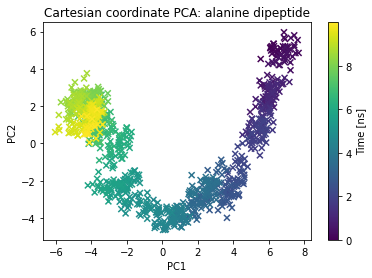

In [41]:
plt.figure()
plt.scatter(reduced_cartesian[:, 0], reduced_cartesian[:,1], marker='x', c=timeline)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Cartesian coordinate PCA')
cbar = plt.colorbar()
cbar.set_label('Time [ns]')
plt.savefig("Cartesian_PCA_md.png")

In [ ]:
#Same procedures for pairwise distance between every atom in each frame PCA

pca2 = PCA() #remove 
from itertools import combinations
# this python function gives you all unique pairs of elements from a list

atom_pairs = list(combinations(range(traj.n_atoms), 2))
pairwise_distances = md.geometry.compute_distances(traj, atom_pairs)
print(pairwise_distances.shape)
reduced_distances = pca2.fit_transform(pairwise_distances)


In [ ]:
plt.figure()
plt.scatter(reduced_distances[:, 0], reduced_distances[:,1], marker='x', c=timeline)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Pairwise distance PCA')
cbar = plt.colorbar()
cbar.set_label('Time [ns]')